# Importando as bibliotecas e os dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/vgsales.csv")

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Trazendo o PyCaret para aplicar a regressão

In [5]:
from pycaret.regression import *

In [22]:
# Preparando o setup do PyCaret
# IMPORTANTE: ativar o use_gpu apenas se você tiver uma GPU para utilizar
s = setup(df, target = 'Global_Sales', session_id = 123, use_gpu=True, normalize=True, transformation=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,Global_Sales
2,Target type,Regression
3,Original data shape,"(16598, 11)"
4,Transformed data shape,"(16598, 22)"
5,Transformed train set shape,"(11618, 22)"
6,Transformed test set shape,"(4980, 22)"
7,Numeric features,6
8,Categorical features,4
9,Rows with missing values,1.8%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

# Comparação entre os modelos

In [24]:
# compare baseline models
# Com o n_select, podemos determinar a quantidade de modelos que serão considerados
best = compare_models(n_select=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.0084,0.2104,0.2261,0.9665,0.0058,0.0008,0.6820
gbr,Gradient Boosting Regressor,0.0152,0.2030,0.2557,0.9627,0.0090,0.0228,1.4370
et,Extra Trees Regressor,0.0267,0.3195,0.3714,0.9369,0.0176,0.0127,0.5800
lightgbm,Light Gradient Boosting Machine,0.0331,0.3801,0.4426,0.9160,0.0312,0.0262,1.2220
ada,AdaBoost Regressor,0.2928,0.2953,0.4602,0.9082,0.2224,5.0673,0.5320
dt,Decision Tree Regressor,0.0136,0.4187,0.3703,0.8827,0.0089,0.0009,0.2890
xgboost,Extreme Gradient Boosting,0.0334,0.5092,0.5530,0.8729,0.0242,0.0156,0.5830
catboost,CatBoost Regressor,0.1137,0.6055,0.6524,0.8196,0.0730,1.0786,8.9460
knn,K Neighbors Regressor,0.1977,1.4134,1.1158,0.4815,0.1493,0.4277,0.2930
br,Bayesian Ridge,0.4605,1.8579,1.2815,0.3322,0.2901,3.7537,0.2800


Processing:   0%|          | 0/94 [00:00<?, ?it/s]

In [23]:
best

[LinearRegression(n_jobs=-1),
 Ridge(random_state=123),
 Lars(random_state=123),
 BayesianRidge(),
 HuberRegressor(),
 PassiveAggressiveRegressor(random_state=123),
 GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random

# Análise do Modelo

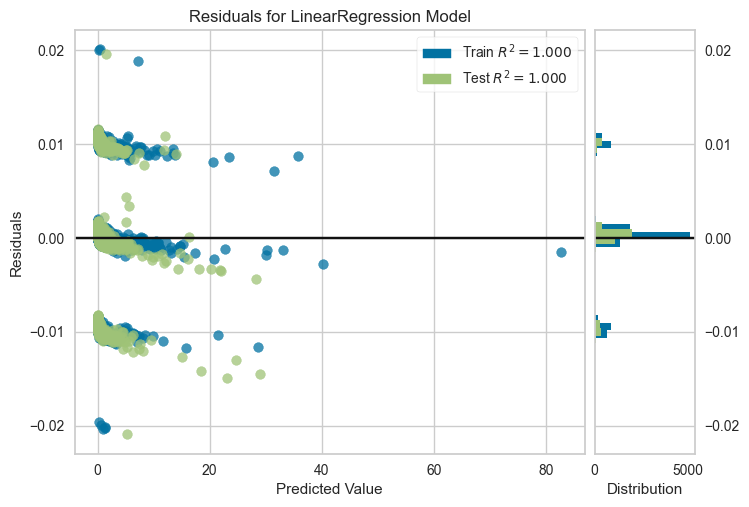

In [13]:
# plot residuals
plot_model(best, plot = 'residuals')

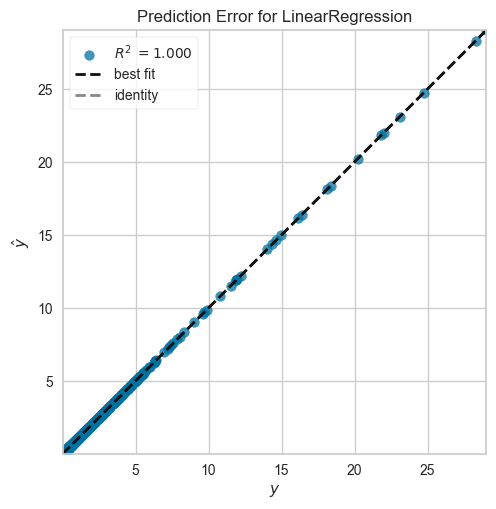

In [14]:
# plot error
plot_model(best, plot = 'error')

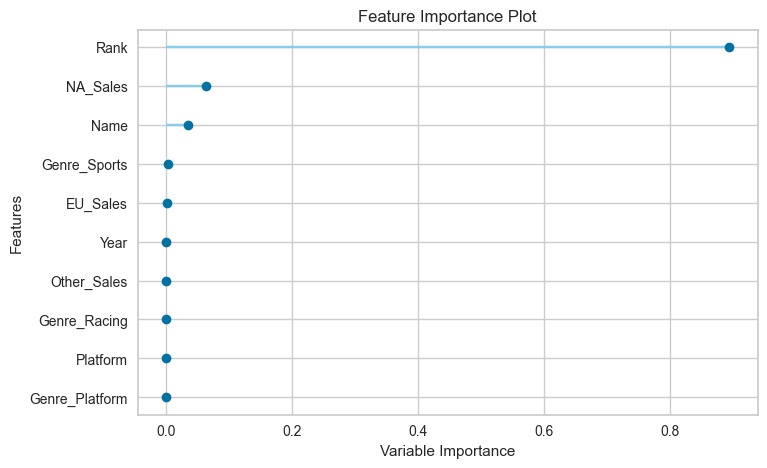

In [25]:
# plot feature importance
plot_model(best[0], plot = 'feature')

In [26]:
evaluate_model(best[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Salvando o Modelo

In [27]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\muril\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Rank', 'Year', 'NA_Sales',
                                              'EU_Sales', 'JP_Sales',
                                              'Other_Sales'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Name', 'Platform', 'Genre',
                                              'Publisher'],
                                     transformer=SimpleImputer(strategy...
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=None, max_leaves=None,
                                min_child_weight=None, missing=nan,
                                monotone_constraints=None, n_estimators=100,